<a href="https://colab.research.google.com/github/manikur/R-programming/blob/gh-pages/Amazonstockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 29.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=45e57b3f8d5a14fe9ec6999981f42ea78744d9437226735a0ce023d7520c40e8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
df = yf.download('AMZN',
 start='2020-01-01',
 end='2021-08-28',
 progress=False)

In [ ]:
df.tail(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-17,3277.500000,3280.489990,3225.679932,3241.959961,3241.959961,3387900
2021-08-18,3241.989990,3254.100098,3200.000000,3201.219971,3201.219971,2804300
2021-08-19,3194.020020,3233.000000,3182.459961,3187.750000,3187.750000,3782900
2021-08-20,3203.870117,3207.810059,3175.760010,3199.949951,3199.949951,3341200
2021-08-23,3211.899902,3280.899902,3210.010010,3265.870117,3265.870117,3268100
2021-08-24,3280.000000,3315.489990,3274.580078,3305.780029,3305.780029,2551800
2021-08-25,3309.870117,3321.000000,3286.149902,3299.179932,3299.179932,1680300
2021-08-26,3299.000000,3332.000000,3296.000000,3316.000000,3316.000000,2098800
2021-08-27,3333.229980,3352.320068,3313.750000,3349.629883,3349.629883,2391300


In [ ]:
import matplotlib.pyplot as plt

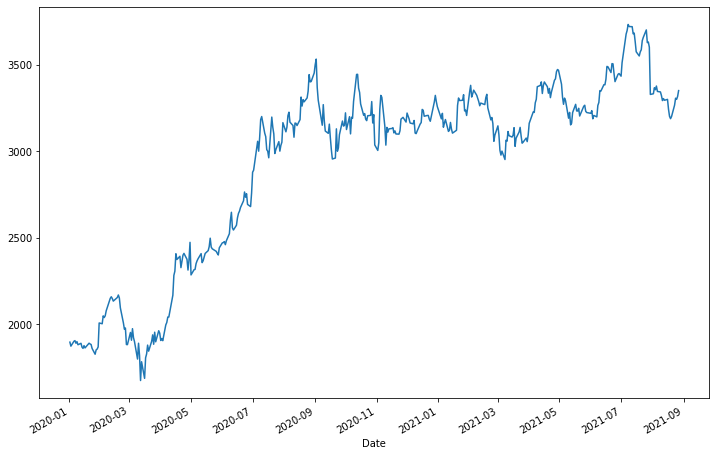

In [ ]:
df['Close'].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c61e14c90>,
      dtype=object)

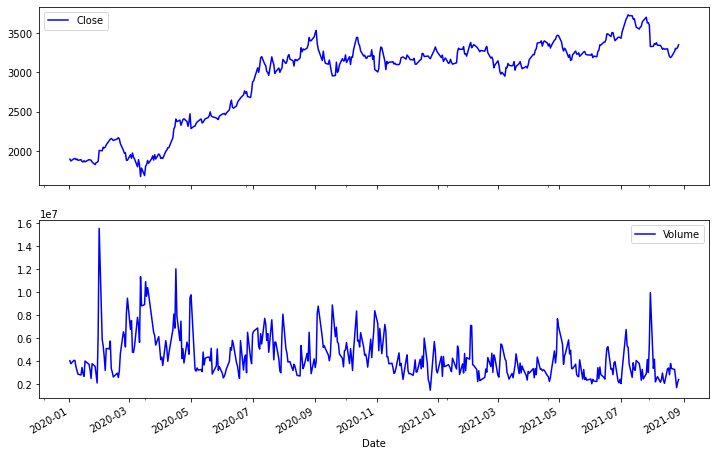

In [ ]:
df[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02
mean,2926.769095,2960.629779,2890.031482,2925.789013,2925.789013,4.371734e+06
std,536.351331,536.756289,530.557505,532.528519,532.528519,1.851227e+06
min,1641.510010,1759.449951,1626.030029,1676.609985,1676.609985,1.451900e+06
25%,2470.364990,2491.489929,2446.485046,2475.099976,2475.099976,3.118000e+06
50%,3152.334961,3187.824951,3113.830078,3148.089966,3148.089966,3.933800e+06
75%,3292.007507,3320.682434,3247.845032,3286.632446,3286.632446,5.223550e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.556730e+07


In [ ]:
df['simple_rtn'] = df.Close.pct_change()

In [ ]:
df['log_rtn'] = np.log(df.Close/df.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c61899a10>],
      dtype=object)

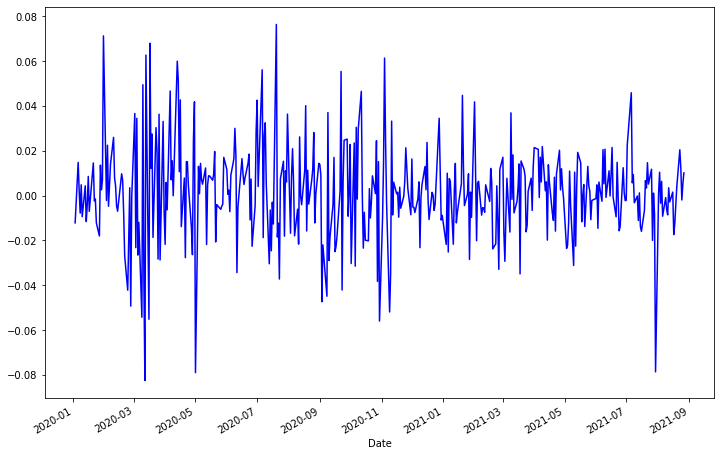

In [ ]:
df['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [ ]:
df['log_rtn'].tail(12)

Date
2021-08-12    0.003454
2021-08-13   -0.002889
2021-08-16    0.001523
2021-08-17   -0.017438
2021-08-18   -0.012646
2021-08-19   -0.004217
2021-08-20    0.003820
2021-08-23    0.020391
2021-08-24    0.012146
2021-08-25   -0.001999
2021-08-26    0.005085
2021-08-27    0.010091
Name: log_rtn, dtype: float64

In [ ]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [ ]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [ ]:
df_rolling.columns = df_rolling.columns.droplevel()

In [ ]:
df_outliers = df.join(df_rolling)

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
df = yf.download(['AMZN', '^VIX'],
start='1985-01-01',
end='2021-08-28',
progress=False)

In [ ]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'AMZN': 'amzn', '^VIX': 'vix'})

In [ ]:
df.tail()

,amzn,vix
Date,,
2021-08-23,3265.870117,17.150000
2021-08-24,3305.780029,17.219999
2021-08-25,3299.179932,16.790001
2021-08-26,3316.000000,18.840000
2021-08-27,3349.629883,16.389999


In [ ]:
df['log_rtn'] = np.log(df.amzn / df.amzn.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'AMZN log returns'),
 Text(0.5, 1.0, 'AMZN vs. VIX ($\\rho$ = -0.33)')]

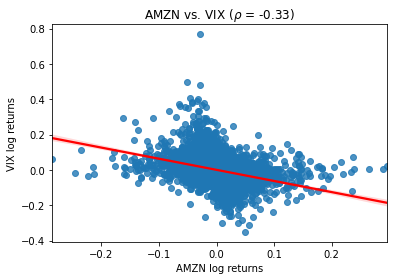

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'AMZN vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='AMZN log returns')

In [ ]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

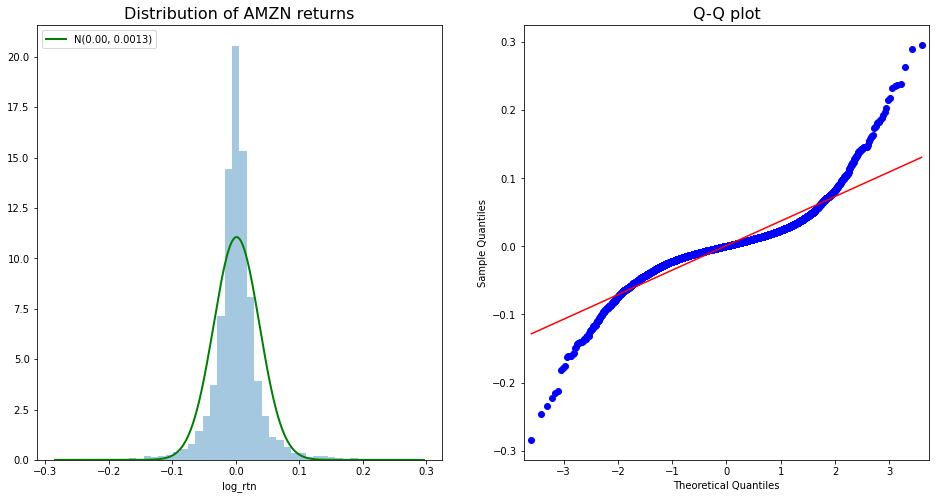

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of AMZN returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

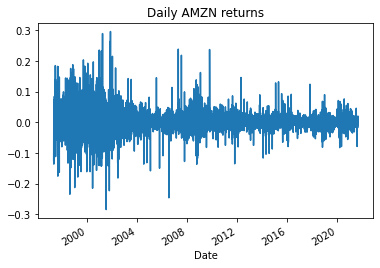

In [ ]:
df.log_rtn.plot(title='Daily AMZN returns')

In [ ]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

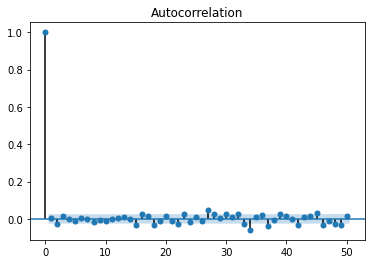

In [ ]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

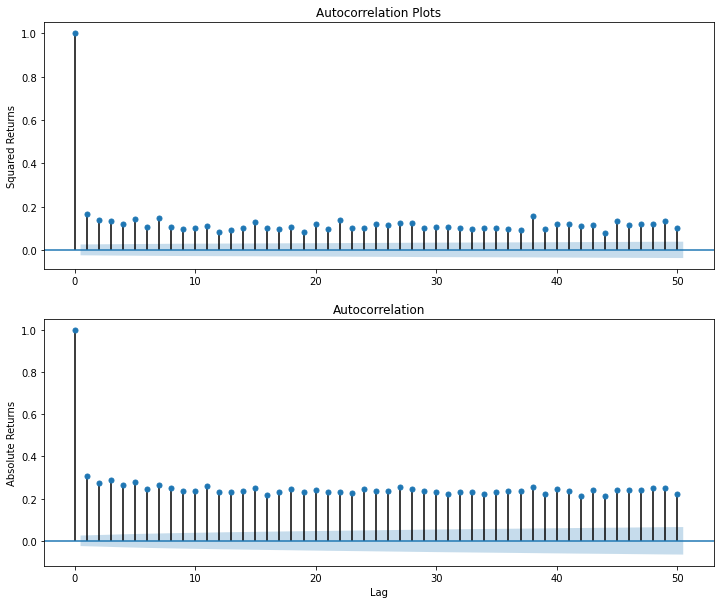

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [ ]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

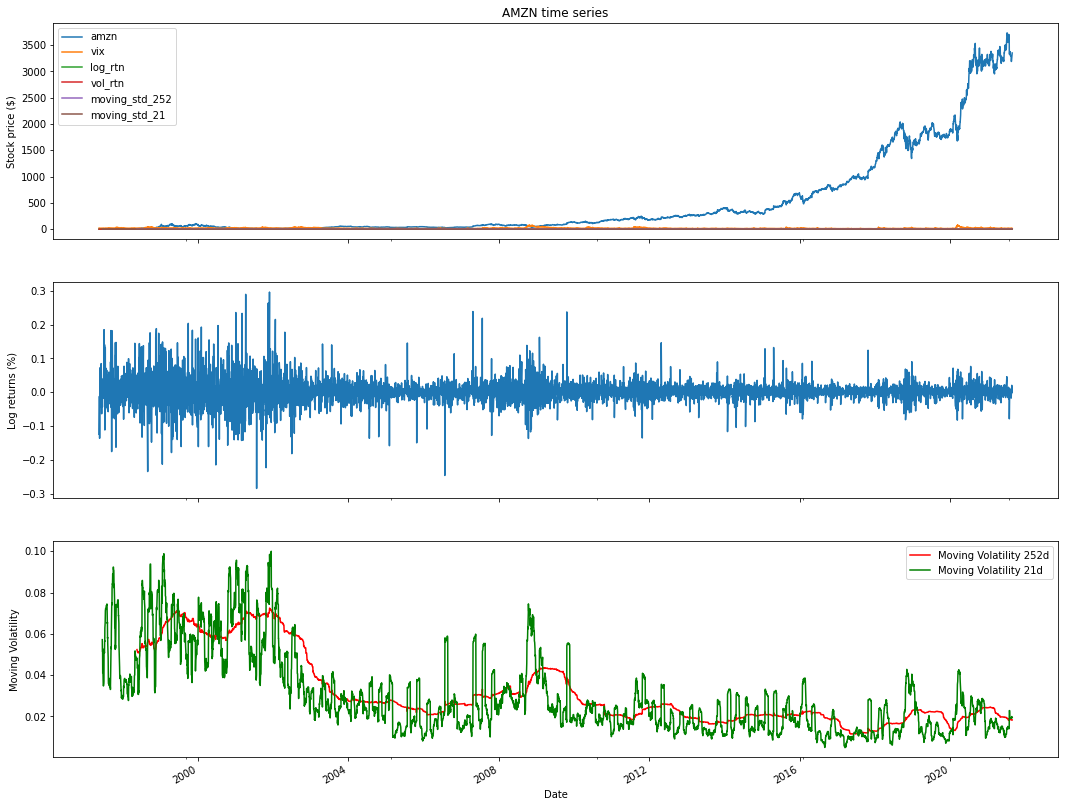

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='AMZN time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()